# Algoritmo de Cluster - DBSCAN

Caio Rego
Disciplina: Aprendizado de Máquina
Professor: Luís Álvaro

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
from collections import Counter

In [140]:
# Carrega os dados de um arquivo CSV
data = pd.read_csv('./dados/iris.csv')

# Remove a coluna com as classes
X = data.drop('target', axis=1)

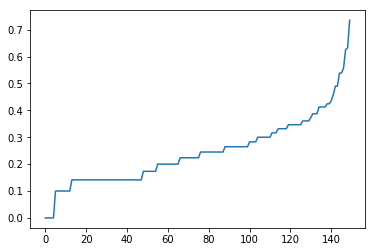

In [141]:
# Gera um gráfico que ajuda a descobrir o nº ideal do valor de EPS

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [145]:
# Define os parâmetros do algoritmo DBSCAN inclusive o EPS
dbscan = DBSCAN(eps=.7, metric='euclidean', min_samples=4).fit(X)
print(dbscan)
print(len(Counter(dbscan.labels_)))

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=None, p=None)
3


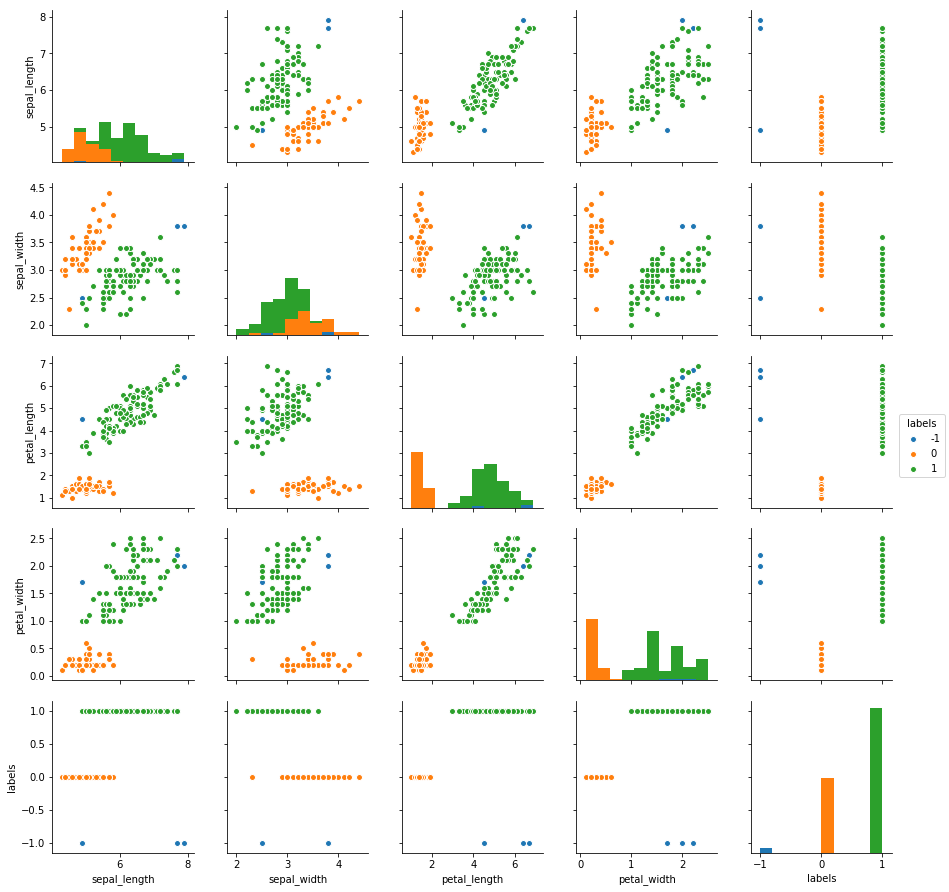

In [147]:
# Adiciona uma coluna no dataframe com os novos cluters
data['labels'] = dbscan.labels_

#Gera o gráfico com os grupos identificados pelo DBSCAN
sb.pairplot(data,hue='labels')

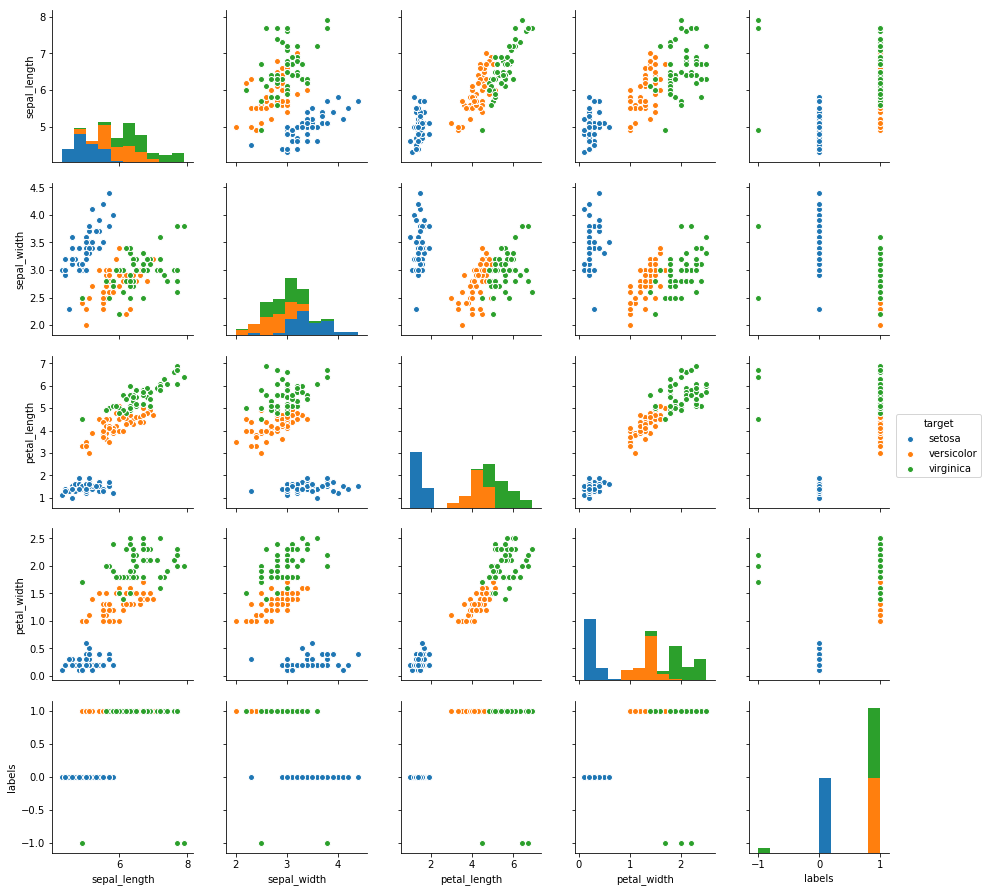

In [148]:
# Gera o gráfico com os grupos originais
sb.pairplot(data, hue='target')

# Agora apresento os resultados gerados com outros dados

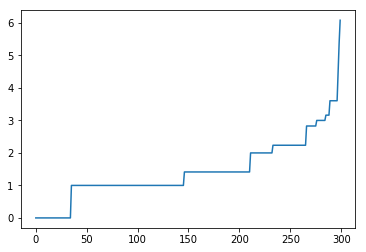

In [149]:
from IPython.display import Image
Image("./img/dbscan-aleatorio-n_cluster.png")

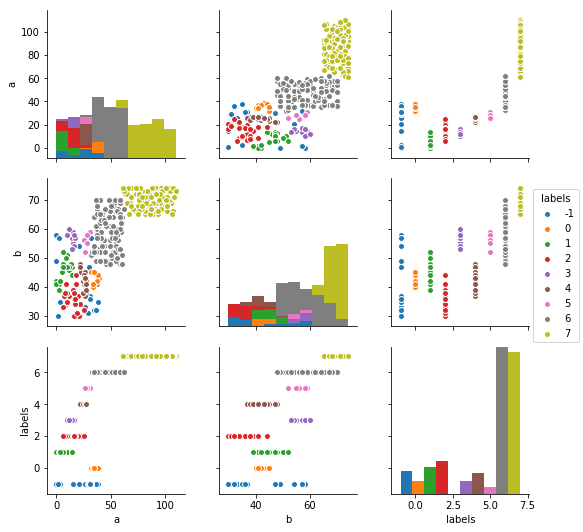

In [150]:
Image("./img/dbscan-aleatorio.png")
# EPS=.3.7 min_samples=4

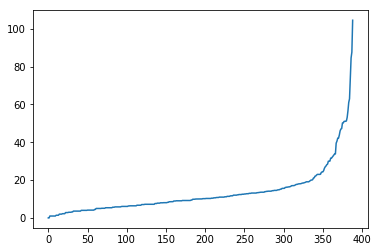

In [151]:
Image("./img/dbscan-densidade-n_cluster.png")

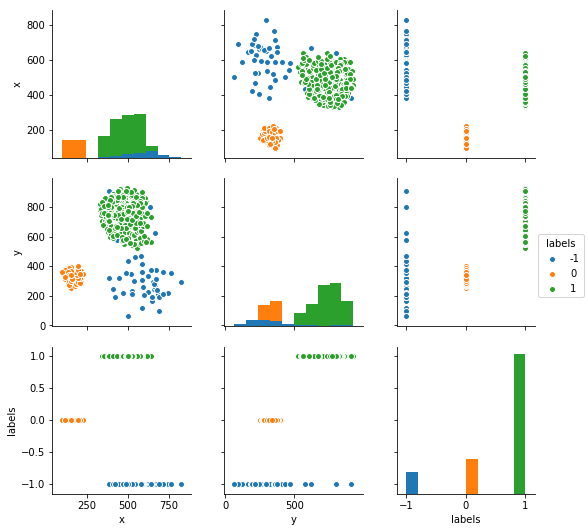

In [152]:
Image("./img/dbscan-densidade.png")
# EPS=.32 min_samples=5

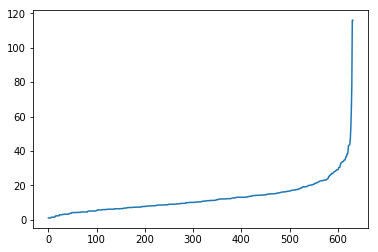

In [153]:
Image("./img/dbscan-linear-n_cluster.png")

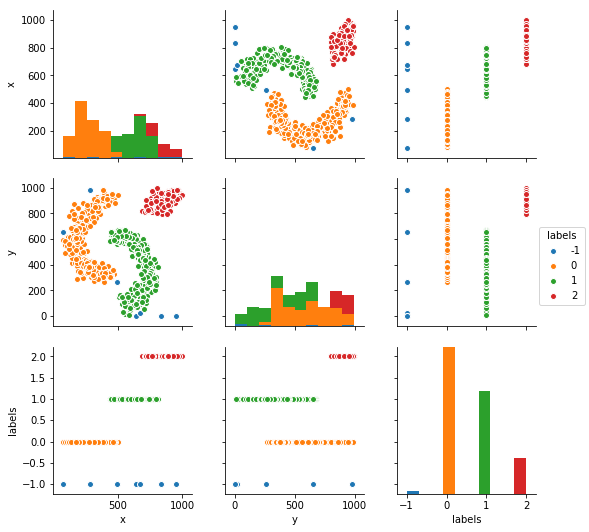

In [154]:
Image("./img/dbscan-linear.png")
# EPS=70 min_samples=3